Usar el conjunto de entrenamiento y validación MINTS para entrenar un modelo de una capa y una neurona usando la función activación 'softmax', una función de perdidas "sparse_categorical_crossentropy" y la metrica 'accuracy'

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8010 - loss: 0.8443 - val_accuracy: 0.8791 - val_loss: 0.5061
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8749 - loss: 0.4888 - val_accuracy: 0.8947 - val_loss: 0.4161
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8863 - loss: 0.4278 - val_accuracy: 0.8999 - val_loss: 0.3809
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8923 - loss: 0.3975 - val_accuracy: 0.9021 - val_loss: 0.3606
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8958 - loss: 0.3786 - val_accuracy: 0.9057 - val_loss: 0.3474
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8995 - loss: 0.3650 - val_accuracy: 0.9087 - val_loss: 0.3374
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9020 - loss: 0.3549 - val_accuracy: 0.9101 - val_loss: 0.3296
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9034 - loss: 0.3469

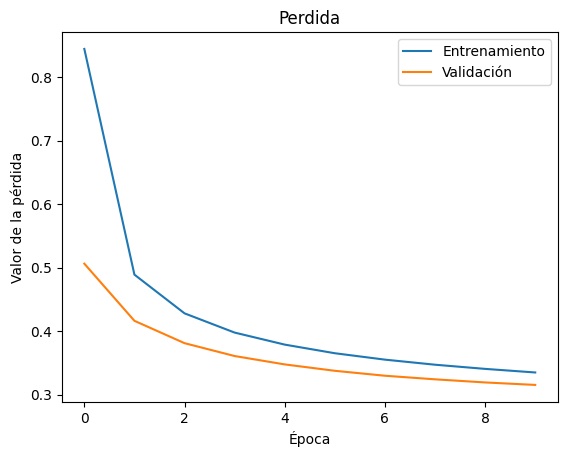

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Cargamos los datos MNIST con la tipiica:
(x_entr, y_entr), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

#Donde entr=entrenamiento y test=prueba

# Normalizamos:
x_entr = x_entr / 255.0
x_test = x_test / 255.0

# "Aplanamos" las imágenes
x_entr = x_entr.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Definimos el modelo como una capa con 10 neuronas porque son 10 numeros del 0 al 9
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='softmax', input_shape=(784,)) #28*28=784
])

#Compilamos el modelo con los parametros dados en la tarea
modelo.compile(
    optimizer='sgd',  # descenso estocástico
    loss='sparse_categorical_crossentropy', #funcion de perdidas
    metrics=['accuracy']
)

# Entrenamos modelo
hist = modelo.fit(
    x_entr, y_entr,
    epochs=10,
    batch_size=32,
    validation_split=0.2  # separar parte de entrenamiento como validación
)

#graficamos la perdida para ver si lo hicimos bien
plt.plot(hist.history['loss'], label='Entrenamiento')
plt.plot(hist.history['val_loss'], label='Validación')
plt.xlabel("Época")
plt.ylabel("Valor de la pérdida")
plt.title("Perdida")
plt.legend()
plt.show()




